In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
data=pd.read_excel('../Data/Insurance-data.xlsx')

## Analyse des données

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [5]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
data.describe()

,age,bmi,children,charges
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.640000,30.865565,1.080000,13099.629425
std,14.169586,6.046396,1.198765,11994.129978
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.600000,0.000000,4719.683425
50%,40.000000,30.590000,1.000000,9286.850750
75%,52.000000,35.112500,2.000000,16073.095438
max,64.000000,50.380000,5.000000,63770.428010


Vérifier si dans mon dataset les colonnes vide 

In [8]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


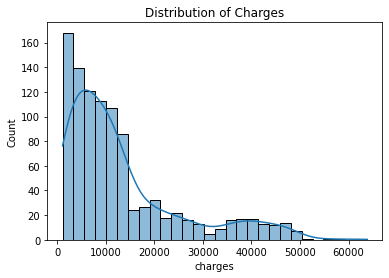

In [9]:
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

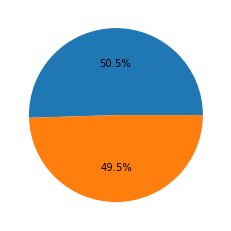

In [10]:
plt.pie(data['sex'].value_counts().values, autopct='%1.1f%%')
plt.show()

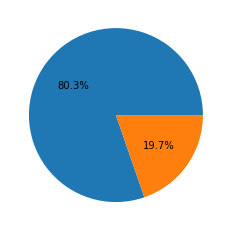

In [11]:
plt.pie(data['smoker'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [12]:
QualitativeData = data.select_dtypes(include=[np.object_]).columns
QuantitativeData = data.select_dtypes(include=[np.number]).columns

In [13]:
def Scatter(Dataset):
    for colonne in Dataset:
        plt.figure(figsize=(10, 6))
        plt.scatter(data['charges'], data[colonne], alpha=0.5)
        plt.title(f'nuage de point représentent Charges vs {colonne}" ')
        plt.xlabel('Charges ')
        plt.ylabel(colonne)
        plt.grid(True)
        plt.show()

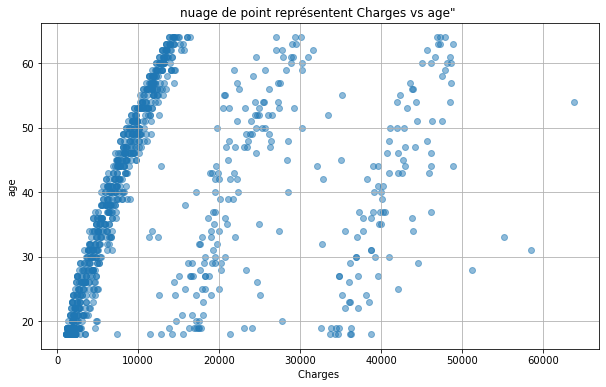

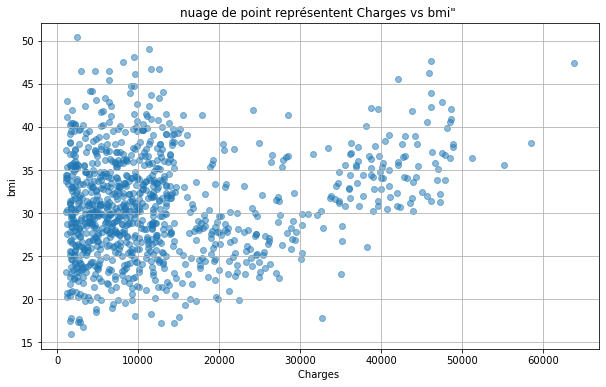

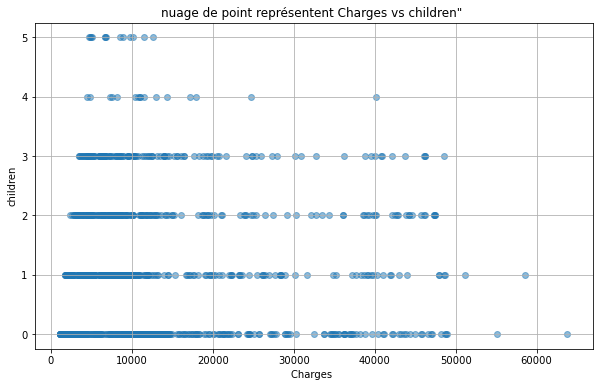

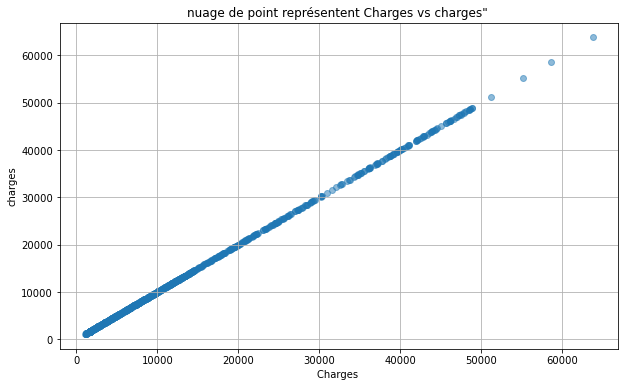

In [14]:
Scatter(QuantitativeData)

On ne remarque pas une forte correlation entre la variables charges et les autre variable quantitatives

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


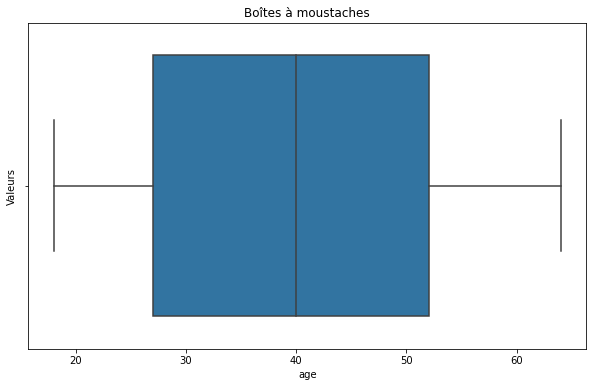

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


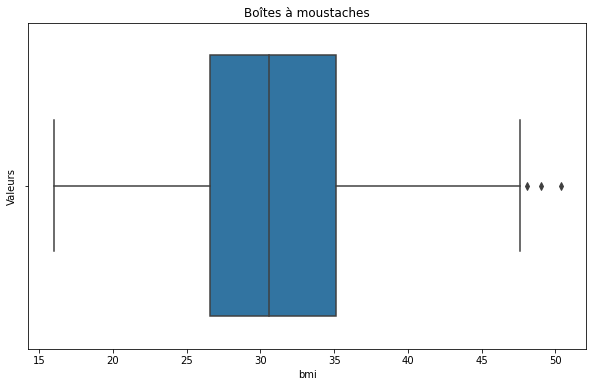

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


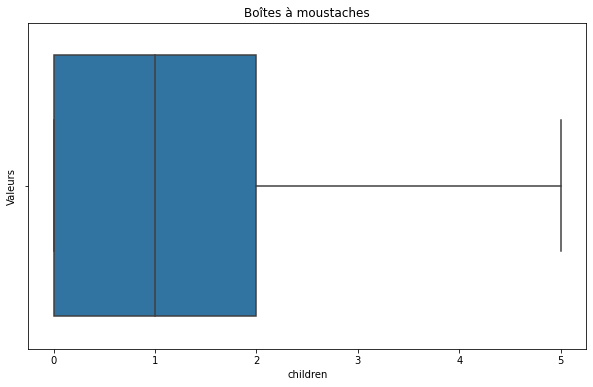

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


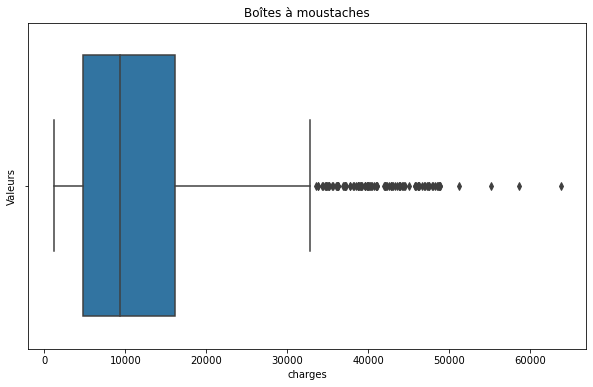

In [15]:
# Créer des boîtes à moustaches pour chaque variable quantitative
def BoxPlot(Dataset):
    for colonne in Dataset:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data[colonne])
        plt.title("Boîtes à moustaches")
        plt.xlabel(colonne)
        plt.ylabel("Valeurs")
        plt.show()
        
BoxPlot(QuantitativeData)

Possibiliter de valeurs abérante pour la variable bim

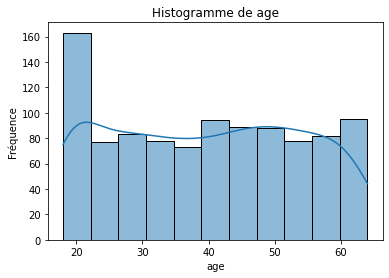

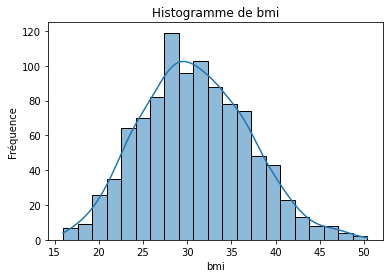

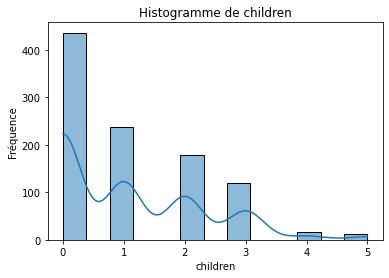

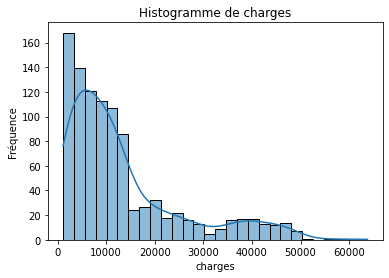

In [16]:
def Hist(DataSet):
    for colonne in DataSet:
        plt.figure()
        sns.histplot(data[colonne], kde=True)
        plt.title(f"Histogramme de {colonne}")
        plt.xlabel(colonne)
        plt.ylabel("Fréquence")
        plt.show()
Hist(QuantitativeData)

### Modification des tables nécessaires

Transformation des variables quatitatives et enregistrer dans les colonnes respective (sex_mod southwest_mod region_mod)

In [17]:
data['sex_mod'] = data['sex'].map({'female': 1, 'male': 2})
data['smoker_mod'] = data['smoker'].map({'yes': 1, 'no': 2})
data['region_mod'] = data['region'].map({'northwest':1, 'northeast':2, 'southwest':3, 'southeast':4})

suppression des tables sex region et smoker

In [18]:
data.drop(['sex','region','smoker'],inplace=True,axis=1)
data.head()

,age,bmi,children,charges,sex_mod,smoker_mod,region_mod
0,19,27.900,0,16884.92400,1,1,3
1,18,33.770,1,1725.55230,2,2,4
2,28,33.000,3,4449.46200,2,2,4
3,33,22.705,0,21984.47061,2,2,1
4,32,28.880,0,3866.85520,2,2,1


In [19]:
# verification encore du type des colonne après modification
data.dtypes

age             int64
bmi           float64
children        int64
charges       float64
sex_mod         int64
smoker_mod      int64
region_mod      int64
dtype: object

### corrélation

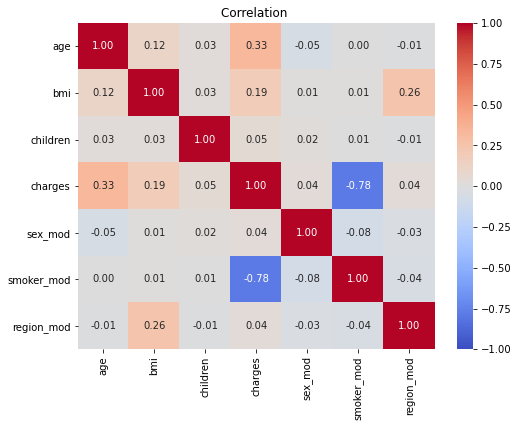

In [20]:
x=data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(x, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation ')
plt.show()

On remarque une forte corrélation négative entre les variables charges et smoker, ce qui montre que lorsque la variable smoker augmente, les charges (montant de l'assurance) diminuent.

## Regression linéaire

In [21]:
lm = LinearRegression()

### Multivarier

In [22]:
# Séparer les données en variables explicatives et variable cible
x = data.drop('charges', axis=1)
y = data['charges']

### Prédiction

In [23]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [24]:

# Entraînement multivariée du modèle
lm.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = lm.predict(x_test)



### Multivarier

In [25]:

# Évaluation du modèle 
mse_multi = mean_squared_error(y_test, y_pred)
rsquare_multi = r2_score(y_test, y_pred)

In [26]:
print("MSE multivariée :", mse_multi, ", R² multivariée :", rsquare_multi)

MSE multivariée : 38498731.84501143 , R² multivariée : 0.7201473058286489


In [27]:
rige_model=Ridge(alpha=5)
rige_model.fit(x_train,y_train)
y_rige_pred=rige_model.predict(x_test)
mse_rige=mean_squared_error(y_test,y_rige_pred)
rsquare_rige=r2_score(y_test,y_rige_pred)
print("mse_multi_ridge :",mse_rige ," , r^2_rige :",rsquare_rige)

mse_multi_ridge : 38159658.415586226  , r^2_rige : 0.7226120782561818


avec un score de 72% je peux dire que mon model prédit assez bien les charges d'assurance 

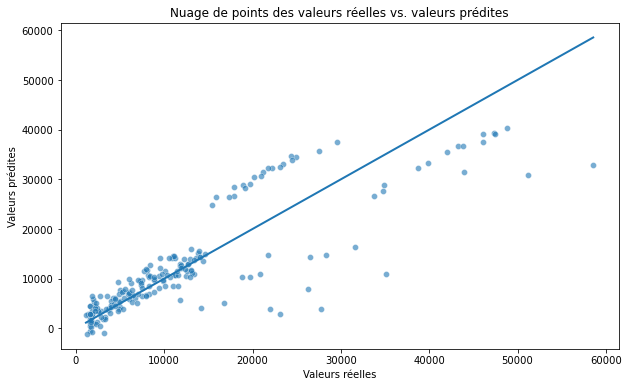

In [28]:
# Créer le nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-', linewidth=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Nuage de points des valeurs réelles vs. valeurs prédites')
plt.show()

### Univariée

In [29]:
# Entrainement  univariée du modèle avec smoker_mod
col = 'smoker_mod'
lm.fit(x_train[[col]],y_train)

y_uniPred=lm.predict(x_test[[col]])

j'utillise smoker car j'ai remarquer dans l'analyse qu'elle etait la seul variables influente

In [30]:

# Évaluation du modèle univarier 
mse_uni = mean_squared_error(y_test, y_uniPred)
rsquare_uni = r2_score(y_test, y_uniPred)

In [31]:
print("MSE univariée :", mse_uni, ", R² univariée :", rsquare_uni)


MSE univariée : 59858059.88239772 , R² univariée : 0.5648833474983754


In [32]:
rige_model=Ridge(alpha=2)
rige_model.fit(x_train[[col]],y_train)
y_rige_pred=rige_model.predict(x_test[[col]])
mse_rige=mean_squared_error(y_test,y_rige_pred)
rsquare_rige=r2_score(y_test,y_rige_pred)
print("mse_multi_ridge :",mse_rige ," , r^2_rige :",rsquare_rige)

mse_multi_ridge : 59793305.65881626  , r^2_rige : 0.5653540550531386
